In [1]:
from pyrolite.mineral import normative
from pyrolite.util.classification import TAS
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import numpy as np
import math

2023-05-15 09:50:18,144 pyrolite.util.plot.helpers - WARNING: scikit-learn not installed


Load data

In [2]:
# Load the geochemisty used as the test input to igrocs
igrocs_input = pd.read_excel('data\igrocs_input.xlsx')
igrocs_input_majors = pd.read_excel('data\igrocs_input_majors.xlsx')

# Load the geochem that has been adjusted and normalised in igrocs
igrocs_input_adj_lemaitre = pd.read_excel('data\igrocs_input_adj_lemaitre.xlsx')
igrocs_input_adj_middlemost = pd.read_excel('data\igrocs_input_adj_middlemost.xlsx')

# Load the results from igrocs (calculated using Le Maitre volcanic Fe adjustment). Round to 3 decimal places
igrocs_norms_lemaitre = pd.read_excel('data\igrocs_norms_lemaitre.xlsx').round(3)
igrocs_norms_lemaitre_majors = pd.read_excel('data\igrocs_norms_lemaitre_majors.xlsx').round(3)

Calculate the norms

In [3]:
# using the Le Maitre Fe Correction
web_norms_lemaitre = normative.CIPW_norm(igrocs_input.copy(deep=True), Fe_correction='lemaitre', adjust_all_Fe=True, return_adjusted_input=True, return_free_components=True, rounding=3)

# using the Le Maitre Fe Correction and major oxides only
web_norms_lemaitre_majors = normative.CIPW_norm(igrocs_input_majors.copy(deep=True), Fe_correction='lemaitre', adjust_all_Fe=True, return_adjusted_input=True, return_free_components=True, rounding=3)

# using the Middlemost Fe Correction
web_norms_middlemost = normative.CIPW_norm(igrocs_input.copy(deep=True), Fe_correction='middlemost', adjust_all_Fe=True, return_adjusted_input=True, return_free_components=True, rounding=3)

In [4]:
web_norms_lemaitre_majors.columns

Index(['quartz', 'zircon', 'potassium metasilicate', 'anorthite',
       'sodium metasilicate', 'acmite', 'thenardite', 'albite', 'orthoclase',
       'perovskite', 'nepheline', 'leucite', 'dicalcium silicate',
       'kaliophilite', 'apatite', 'fluroapatite', 'fluorite', 'pyrite',
       'chromite', 'ilmenite', 'calcite', 'corundum', 'rutile', 'magnetite',
       'hematite', 'forsterite', 'fayalite', 'clinoferrosilite',
       'clinoenstatite', 'ferrosilite', 'enstatite', 'wollastonite',
       'cancrinite', 'halite', 'titanite', 'diopside', 'hypersthene',
       'olivine', 'SiO2', 'TiO2', 'Al2O3', 'Fe2O3', 'FeO', 'MnO', 'MgO', 'CaO',
       'Na2O', 'K2O', 'P2O5', 'F', 'Cl', 'S', 'CO2', 'NiO', 'CoO', 'SrO',
       'BaO', 'Rb2O', 'Cs2O', 'Li2O', 'ZrO2', 'Cr2O3', 'V2O3', 'SO3', 'FREE_O',
       'FREE_CO2', 'FREE_OXIDES', 'FREE_DEFSIO2'],
      dtype='object')

Plot Le Maitre corrected FeO and Fe2O3 from webNORM and IgRoCS

In [5]:
# Create a figure with 2 subplots
fig = make_subplots(rows=1, cols=2, horizontal_spacing=0.15)


#### Le Maitre ####
# Define a 1:1 line on both plots
fig.append_trace(
    go.Scatter(
        showlegend=False,
        x=[0,100],
        y=[0,100],
        mode='lines',
        line=dict(color='black')
        ),
    row=1,
    col=1
)

fig.append_trace(
    go.Scatter(
        showlegend=False,
        x=[0,100],
        y=[0,100],
        mode='lines',
        line=dict(color='black')
        ),
    row=1,
    col=2
)



#### FeO ####
# Create filter for samples that have a difference greater than 1%
pct_diff_filter = abs(web_norms_lemaitre['FeO'] - igrocs_input_adj_lemaitre['FeO']) / igrocs_input_adj_lemaitre['FeO'] > 0.01

# Plot the samples that have a difference less than 1%
fig.append_trace(
go.Scatter(
    x=web_norms_lemaitre['FeO'].round(3)[pct_diff_filter==False],
    y=igrocs_input_adj_lemaitre['FeO'].round(3)[pct_diff_filter==False],
    showlegend=True,
    name='Difference < 1%',
    mode='markers',
    marker=dict(
            color="#57C4AD",
            opacity=0.75,
            line=dict(
                color='#006164',
                width=1))
    ),
row=1,
col=1
)

# Plot the samples that have a difference greater than 1%
fig.append_trace(
    go.Scatter(
        x=web_norms_lemaitre['FeO'].round(3)[pct_diff_filter],
        y=igrocs_input_adj_middlemost['FeO'].round(3)[pct_diff_filter],
        showlegend=True,
        name='Difference > 1%', 
        mode='markers',
        marker=dict(
            symbol='x',
            color="#DB4325",
            opacity=0.75,
            line=dict(
                color='#8b2a17',
                width=1))
        ),
    row=1,
    col=1
)

fig.update_xaxes(
    title_text="% FeO (webNORM)",
    title_font = {"size": 16},
    # title_standoff = 5,
    range=[0,web_norms_lemaitre['FeO'].max()*1.25],
    dtick=2,
    row=1,
    col=1,
    gridcolor='lightgrey',
    linecolor='black'
    )

fig.update_yaxes(
    title_text='% FeO (IgRoCs)',
    title_font = {"size": 16},
    # title_standoff = 0,
    range=[0,web_norms_lemaitre['FeO'].max()*1.25],
    dtick=2,
    row=1,
    col=1,
    gridcolor='lightgrey',
    linecolor='black'
)


#### Fe2O3 ####
# Create filter for samples that have a difference greater than 1%
pct_diff_filter = abs(web_norms_lemaitre['Fe2O3'] - igrocs_input_adj_lemaitre['Fe2O3']) / igrocs_input_adj_lemaitre['Fe2O3'] > 0.01

# Plot the samples that have a difference less than 1%
fig.append_trace(
go.Scatter(
    x=web_norms_lemaitre['Fe2O3'].round(3)[pct_diff_filter==False],
    y=igrocs_input_adj_lemaitre['Fe2O3'].round(3)[pct_diff_filter==False],
    showlegend=False,
    mode='markers',
    marker=dict(
            color="#57C4AD",
            opacity=0.75,
            line=dict(
                color='#006164',
                width=1))
    ),
row=1,
col=2
)

# Plot the samples that have a difference greater than 1%
fig.append_trace(
    go.Scatter(
        x=web_norms_lemaitre['Fe2O3'].round(3)[pct_diff_filter],
        y=igrocs_input_adj_middlemost['Fe2O3'].round(3)[pct_diff_filter],
        showlegend=False,
        mode='markers',
        marker=dict(
            symbol='x',
            color="#DB4325",
            opacity=0.75,
            line=dict(
                color='#8b2a17',
                width=1))
        ),
    row=1,
    col=2
)


fig.update_xaxes(
    title_text="% {} (webNORM)".format('Fe<sub>2</sub>O<sub>3</sub>'),
    title_font = {"size": 16},
    # title_standoff = 5,
    range=[0,web_norms_lemaitre['Fe2O3'].max()*1.25],
    dtick=2,
    row=1,
    col=2,
    gridcolor='lightgrey',
    linecolor='black'
    )

fig.update_yaxes(
    title_text='% {} (IgRoCs)'.format('Fe<sub>2</sub>O<sub>3</sub>'),
    title_font = {"size": 16},
    # title_standoff = 0,
    range=[0,web_norms_lemaitre['Fe2O3'].max()*1.25],
    dtick=2,
    row=1,
    col=2,
    gridcolor='lightgrey',
    linecolor='black'
)

# add a bounding box around the subplots

fig.update_xaxes(
    row=1,
    col=1,
    showline=True,
    linewidth=1,
    linecolor='black',
    mirror=True
    )

fig.update_xaxes(
    row=1,
    col=2,
    showline=True,
    linewidth=1,
    linecolor='black',
    mirror=True
    )

fig.update_yaxes(
    row=1,
    col=1,
    showline=True,
    linewidth=1,
    linecolor='black',
    mirror=True
)

fig.update_yaxes(
    row=1,
    col=2,
    showline=True,
    linewidth=1,
    linecolor='black',
    mirror=True
)


fig.update_layout(
    {
        'yaxis1': dict(
        # scaleanchor = "x1",
        scaleratio = 1
        ),
        'yaxis2': dict(
        # scaleanchor = "x2",
        scaleratio = 1
        ),
    }
    )



fig.update_layout(showlegend=True, height=550, width=1100,plot_bgcolor='rgba(0,0,0,0)', title_x=0.5)
fig.show()
# fig.write_image('LeMairtreAdjustment_FeO_Fe2O3.pdf')

Find the number of samples where the difference between webNORM and IgRoCS is > 0 for the Le Maitre corrected FeO and Fe2O3

In [6]:
FeO_diff = (web_norms_lemaitre['FeO'] - igrocs_input_adj_lemaitre['FeO']).round(3).abs()
Fe2O3_diff = (web_norms_lemaitre['Fe2O3'] - igrocs_input_adj_lemaitre['Fe2O3']).round(3).abs()


print('Total samples: ', len(web_norms_lemaitre))

print('FeO:')
print('n samples with difference > 0.002 =', len(FeO_diff[FeO_diff > 0.0]))
print('max difference =', max(FeO_diff))

print('Fe2O3:')
print('n samples with difference > 0.002 =', len(Fe2O3_diff[Fe2O3_diff > 0.0]))
print('max difference =', max(Fe2O3_diff))

Total samples:  551
FeO:
n samples with difference > 0.002 = 117
max difference = 0.002
Fe2O3:
n samples with difference > 0.002 = 130
max difference = 0.003


Plot Middlemost corrected FeO and Fe2O3 from webNORM and IgRoCS

In [7]:
# Create a figure with 2 subplots
fig = make_subplots(rows=1, cols=2, horizontal_spacing=0.15)

# Define a 1:1 line on both plots
fig.append_trace(
    go.Scatter(
        x=[0,100],
        y=[0,100],
        showlegend=False,
        mode='lines',
        line=dict(color='black')
        ),
    row=1,
    col=1
)

fig.append_trace(
    go.Scatter(
        x=[0,100],
        y=[0,100],
        showlegend=False,
        mode='lines',
        line=dict(color='black')
        ),
    row=1,
    col=2
)



#### FeO ####
# Create filter for samples that have a difference greater than 1%
pct_diff_filter = abs(web_norms_middlemost['FeO'] - igrocs_input_adj_middlemost['FeO']) > 0.002

# Plot the samples that have a difference less than 1%
fig.append_trace(
go.Scatter(
    x=web_norms_middlemost['FeO'][pct_diff_filter==False],
    y=igrocs_input_adj_middlemost['FeO'][pct_diff_filter==False],
    showlegend=True,
    name='Difference < 1%',
    mode='markers',
    marker=dict(
            color="#57C4AD",
            opacity=0.75,
            line=dict(
                color='#006164',
                width=1))
    ),
row=1,
col=1
)

# Plot the samples that have a difference greater than 0.002%
fig.append_trace(
    go.Scatter(
        x=web_norms_middlemost['FeO'][pct_diff_filter],
        y=igrocs_input_adj_middlemost['FeO'][pct_diff_filter],
        name='Difference > 1%',
        mode='markers',
        marker=dict(
            symbol='x',
            color="#DB4325",
            opacity=0.75,
            line=dict(
                color='#8b2a17',
                width=1)),
                
        ),
    row=1,
    col=1
)

fig.update_xaxes(
    title_text="% FeO (webNORM)",
    title_font = {"size": 16},
    # title_standoff = 5,
    range=[0,web_norms_middlemost['FeO'].max()*1.25],
    dtick=2,
    row=1,
    col=1,
    gridcolor='lightgrey',
    linecolor='black'
    )

fig.update_yaxes(
    title_text='% FeO (IgRoCs)',
    title_font = {"size": 16},
    # title_standoff = 0,
    range=[0,web_norms_middlemost['FeO'].max()*1.25],
    dtick=2,
    row=1,
    col=1,
    gridcolor='lightgrey',
    linecolor='black'
)


#### Fe2O3 ####
# Create filter for samples that have a difference greater than 0.002%
pct_diff_filter = abs(web_norms_middlemost['Fe2O3'] - igrocs_input_adj_middlemost['Fe2O3']) > 0.002

# Plot the samples that have a difference less than 1%
fig.append_trace(
go.Scatter(
    x=web_norms_middlemost['Fe2O3'][pct_diff_filter==False],
    y=igrocs_input_adj_middlemost['Fe2O3'][pct_diff_filter==False],
    showlegend=False,
    mode='markers',
    marker=dict(
            color="#57C4AD",
            opacity=0.75,
            line=dict(
                color='#006164',
                width=1))
    ),
row=1,
col=2
)

# Plot the samples that have a difference greater than 1%
fig.append_trace(
    go.Scatter(
        x=web_norms_middlemost['Fe2O3'][pct_diff_filter],
        y=igrocs_input_adj_middlemost['Fe2O3'][pct_diff_filter],
        showlegend=False,
        mode='markers',
        marker=dict(
            symbol='x',
            color="#DB4325",
            opacity=0.75,
            line=dict(
                color='#8b2a17',
                width=1))
        ),
    row=1,
    col=2
)

# Fe<sub>2</sub>O<sub>3</sub>

fig.update_xaxes(
    title_text="% {} (webNORM)".format('Fe<sub>2</sub>O<sub>3</sub>'),
    title_font = {"size": 16},
    # title_standoff = 5,
    range=[0,web_norms_middlemost['Fe2O3'].max()*1.25],
    dtick=2,
    row=1,
    col=2,
    gridcolor='lightgrey',
    linecolor='black'
    )

fig.update_yaxes(
    title_text='% {} (IgRoCs)'.format('Fe<sub>2</sub>O<sub>3</sub>'),
    title_font = {"size": 16},
    # title_standoff = 0,
    range=[0,web_norms_middlemost['Fe2O3'].max()*1.25],
    dtick=2,
    row=1,
    col=2,
    gridcolor='lightgrey',
    linecolor='black'
)

# Add bounding box

fig.update_xaxes(
    row=1,
    col=1,
    showline=True,
    linewidth=1,
    linecolor='black',
    mirror=True
    )

fig.update_xaxes(
    row=1,
    col=2,
    showline=True,
    linewidth=1,
    linecolor='black',
    mirror=True
    )

fig.update_yaxes(
    row=1,
    col=1,
    showline=True,
    linewidth=1,
    linecolor='black',
    mirror=True
)

fig.update_yaxes(
    row=1,
    col=2,
    showline=True,
    linewidth=1,
    linecolor='black',
    mirror=True
)


fig.update_layout(
    {
        'yaxis1': dict(
        # scaleanchor = "x1",
        scaleratio = 1
        ),
        'yaxis2': dict(
        # scaleanchor = "x2",
        scaleratio = 1
        ),
    }
    )

fig.update_layout(showlegend=True, height=550, width=1100,plot_bgcolor='rgba(0,0,0,0)', title_x=0.5)
fig.show()
fig.write_image('figures/MiddlemostAdjustment_FeO_Fe2O3.png', scale=10)

Find the number of samples where the difference between webNORM and IgRoCS is > 0 for the Middlemost corrected FeO and Fe2O3

In [8]:
FeO_diff = (web_norms_middlemost['FeO'] - igrocs_input_adj_middlemost['FeO']).round(3).abs()
Fe2O3_diff = (web_norms_middlemost['Fe2O3'] - igrocs_input_adj_middlemost['Fe2O3']).round(3).abs()


print('Total samples: ', len(web_norms_middlemost))

print('FeO:')
print('n samples with difference > 0.002 =', len(FeO_diff[FeO_diff > 0.002]))
print('max difference =', max(FeO_diff))

print('Fe2O3:')
print('n samples with difference > 0.002 =', len(Fe2O3_diff[Fe2O3_diff > 0.002]))
print('max difference =', max(Fe2O3_diff))


Total samples:  551
FeO:
n samples with difference > 0.002 = 22
max difference = 0.675
Fe2O3:
n samples with difference > 0.002 = 22
max difference = 0.741


Plot the samples on a TAS diagram

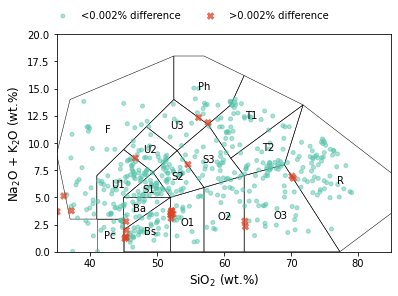

In [9]:
import pyrolite.plot
import matplotlib.pyplot as plt


filter = abs(web_norms_middlemost['Fe2O3'] - igrocs_input_adj_middlemost['Fe2O3']) / igrocs_input_adj_middlemost['Fe2O3'] > 0.01

web_norms_middlemost["Na2O + K2O"] = web_norms_middlemost[["Na2O", "K2O"]].sum(axis=1)

cm = TAS()


# fig, ax = plt.subplots(1)
# cm.add_to_axes(ax, alpha=1, linewidth=0.5, zorder=-1, add_labels=True)

# web_norms_middlemost[filter==False][["SiO2", "Na2O + K2O"]].pyroplot.scatter(ax=ax, c="#57C4AD", alpha=0.5, marker='o')

# web_norms_middlemost[filter][["SiO2", "Na2O + K2O"]].pyroplot.scatter(ax=ax, c="#DB4325", marker='x', alpha=0.75, s=30, linewidths=3)

# # web_norms_middlemost[filter==False][["SiO2", "Na2O + K2O"]].pyroplot.scatter(ax=ax, c=TAS_fields[filter==False], marker='.', alpha=0.75, s=30, linewidths=1)

# # web_norms_middlemost[filter][["SiO2", "Na2O + K2O"]].pyroplot.scatter(ax=ax, c=TAS_fields[filter], marker='x', alpha=0.75, s=30, linewidths=1)

# # web_norms_middlemost[["SiO2", "Na2O + K2O"]].pyroplot.scatter(ax=ax, c=TAS_fields, marker='.', alpha=0.75, s=10, linewidths=0, cmap='tab20')






fig, ax = plt.subplots(1)
cm.add_to_axes(ax, alpha=1, linewidth=0.5, zorder=-1, add_labels=True)

scatter1 = web_norms_middlemost[filter==False][["SiO2", "Na2O + K2O"]].pyroplot.scatter(ax=ax, c="#57C4AD", alpha=0.5, marker='o', label='<0.002% difference')

scatter2 = web_norms_middlemost[filter][["SiO2", "Na2O + K2O"]].pyroplot.scatter(ax=ax, c="#DB4325", marker='x', alpha=0.75, s=30, linewidths=3, label='>0.002% difference')

# update the axes labels
ax.set_xlabel('SiO$_2$ (wt.%)')
ax.set_ylabel('Na$_2$O + K$_2$O (wt.%)')

# add a legend
ax.legend(loc='upper center', bbox_to_anchor=(0.4, 1.15), shadow=True, ncol=2)


plt.savefig('figures/TAS_Errors.png', dpi=900, bbox_inches='tight', )
plt.show()




The samples which show an error in the Middlemost Fe adjustment lie on the TAS classification boundary.

In [10]:
norm_minerals = ['quartz', 'zircon', 'potassium metasilicate', 'anorthite',
       'sodium metasilicate', 'acmite', 'thenardite', 'albite', 'orthoclase',
       'perovskite', 'nepheline', 'leucite', 'dicalcium silicate',
       'kaliophilite', 'apatite', 'fluorite', 'pyrite',
       'chromite', 'ilmenite', 'calcite', 'corundum', 'rutile', 'magnetite',
       'hematite', 'forsterite', 'fayalite', 'clinoferrosilite',
       'clinoenstatite', 'ferrosilite', 'enstatite', 'wollastonite',
       'cancrinite', 'halite', 'titanite']

majors=['SiO2', 'TiO2', 'Al2O3', 'Fe2O3', 'FeO', 'MnO', 'MgO', 'CaO', 'Na2O',
       'K2O', 'P2O5']

In [11]:

major_sum_filter = igrocs_input[majors].sum(axis=1) >= 75

data=[]

data.append(
    go.Scatter(
        x=[75,75],
        y=[90,200],
        mode='lines',
        line=dict(
            dash='dash',
            color='grey'
        ),
        showlegend=False
    )
)

data.append(
    go.Scatter(
        x=igrocs_input[majors][major_sum_filter].sum(axis=1),
        y=web_norms_lemaitre[norm_minerals][major_sum_filter].sum(axis=1),
        mode='markers',
        marker=dict(
            color="#57C4AD",
            opacity=0.5,
            line=dict(
                color='#006164',
                width=1)),
        name='Major Oxides<br>Sum > 75%'
    )
)

data.append(
    go.Scatter(
        x=igrocs_input[majors][major_sum_filter==False].sum(axis=1),
        y=web_norms_lemaitre[norm_minerals][major_sum_filter==False].sum(axis=1),
        mode='markers',
        marker=dict(
            color="#DB4325",
            opacity=0.5,
            line=dict(
                color='#8b2a17',
                width=1)),
        name='Major Oxides<br>Sum < 75%'
    )
)


fig=go.Figure(data=data)

fig.update_yaxes(
            title_text='Norm Sum',
            gridcolor='lightgrey',
            linecolor='black',
            range=[95,185]
            )

fig.update_xaxes(
            title_text='Major Element Sum',
            gridcolor='white',
            linecolor='black'
            )


fig.update_layout(height=500, width=700, showlegend=True, plot_bgcolor='rgba(0,0,0,0)', title_x=0.5)


fig.show()
fig.write_image('figures/Major Element Sum vs Normative Mineralogy Sum.png', scale=2)

In [12]:
major_sum_filter = igrocs_input[majors].sum(axis=1) >= 75

web_norms_lemaitre = web_norms_lemaitre[major_sum_filter]
web_norms_lemaitre_majors = web_norms_lemaitre_majors[major_sum_filter]

igrocs_norms_lemaitre = igrocs_norms_lemaitre[major_sum_filter]
igrocs_norms_lemaitre_majors = igrocs_norms_lemaitre_majors[major_sum_filter]

In [13]:
# Filter out samples where all minerals in igrocs have a value of zero
# This is done as igrocs has some samples where it does not report any minerals due to some issues it has with the data

igrocs_no_output_filter = igrocs_norms_lemaitre[norm_minerals].fillna(0).sum(axis=1)!=0
igrocs_majors_no_output_filter = igrocs_norms_lemaitre_majors[norm_minerals].fillna(0).sum(axis=1)!=0

web_norms_lemaitre = web_norms_lemaitre[igrocs_no_output_filter]
web_norms_lemaitre_majors = web_norms_lemaitre_majors[igrocs_majors_no_output_filter]

igrocs_norms_lemaitre = igrocs_norms_lemaitre[igrocs_no_output_filter]
igrocs_norms_lemaitre_majors = igrocs_norms_lemaitre_majors[igrocs_majors_no_output_filter]

C:\Users\tb648\AppData\Local\Temp\ipykernel_43752\1425986648.py:4: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

C:\Users\tb648\AppData\Local\Temp\ipykernel_43752\1425986648.py:5: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [14]:
# get a list of minerals to plot based on whether there is any data in the igrocs or web data
plot_norms = []

for i in igrocs_norms_lemaitre.columns.tolist():
    if igrocs_norms_lemaitre_majors[i].max() or web_norms_lemaitre_majors[i].max() > 0:
        plot_norms.append(i)


# define the number of rows and columns for the subplots
cols=5
rows=math.ceil((len(plot_norms)/cols))

# create the figure
fig = make_subplots(rows=rows, cols=cols, subplot_titles=plot_norms, horizontal_spacing=0.075)

#Add dummy traces to get legend to work
fig.append_trace(
                go.Scatter(
                    x=[0],
                    y=[0],
                    mode='markers',
                    marker=dict(
                        color="#57C4AD",
                        opacity=0.75,
                        line=dict(
                            color='#006164',
                            width=1)),
                    name=r'<0.01% difference',
                    showlegend=True
                    ),
                row=1,
                col=1
            )
fig.append_trace(
                go.Scatter(
                    x=[0],
                    y=[0],
                    mode='markers',
                    marker=dict(
                        symbol='x',
                        color="#DB4325",
                        opacity=0.75,
                        line=dict(
                            color='#8b2a17',
                            width=1)),
                    name=r'>0.01% difference',
                    showlegend=True
                    ),
                row=1,
                col=1
            )


# Iterate through each subplot and add traces for each mineral
list_index = 0
n_plots = len(plot_norms)

for i in range(1,rows+1):
    for j in range(1,cols+1):
        if list_index + 1 <= n_plots:
            trace = plot_norms[list_index]

            # pct_diff_norms_filter = abs(pd.to_numeric(web_norms_lemaitre_majors[trace], errors='coerce') - 
            # pd.to_numeric(igrocs_norms_lemaitre_majors[trace], errors='coerce')) / pd.to_numeric(igrocs_norms_lemaitre_majors[trace], errors='coerce') > 0.01
            pct_diff_norms_filter = abs(pd.to_numeric(web_norms_lemaitre_majors[trace], errors='coerce') - 
            pd.to_numeric(igrocs_norms_lemaitre_majors[trace], errors='coerce')) > 0.01



            fig.append_trace(
                go.Scatter(
                    showlegend=False,
                    x=[0,100],
                    y=[0,100],
                    mode='lines',
                    line=dict(color='black')
                    ),
                row=i,
                col=j
            )

            fig.append_trace(
            go.Scatter(
                showlegend=False,
                x=pd.to_numeric(web_norms_lemaitre_majors[trace][pct_diff_norms_filter==False], errors='coerce').fillna(0),
                y=pd.to_numeric(igrocs_norms_lemaitre_majors[trace][pct_diff_norms_filter==False], errors='coerce').fillna(0),
                mode='markers',
                marker=dict(
                        color="#57C4AD",
                        opacity=0.75,
                        line=dict(
                            color='#006164',
                            width=1)),
                name=trace
                ),
            row=i,
            col=j
            )

            fig.append_trace(
                go.Scatter(
                    showlegend=False,
                    x=pd.to_numeric(web_norms_lemaitre_majors[trace][pct_diff_norms_filter], errors='coerce').fillna(0),
                    y=pd.to_numeric(igrocs_norms_lemaitre_majors[trace][pct_diff_norms_filter], errors='coerce').fillna(0),
                    mode='markers',
                    marker=dict(
                        symbol='x',
                        color="#DB4325",
                        opacity=0.75,
                        line=dict(
                            color='#8b2a17',
                            width=1)),
                    name=trace
                    ),
                row=i,
                col=j
            )
            
            x_max = pd.to_numeric(web_norms_lemaitre_majors[trace], errors='coerce').max()
            y_max =  pd.to_numeric(igrocs_norms_lemaitre_majors[trace], errors='coerce').max()

            xy_max = max([x_max, y_max])*1.1
            if xy_max == 0:
                xy_max = 100

            fig.update_xaxes(
                title_text="webNORM",
                title_font = {"size": 12},
                title_standoff = 5,
                range=[0,xy_max],
                row=i,
                col=j,
                gridcolor='lightgrey',
                linecolor='black'
                )
            
            fig.update_yaxes(
                title_text='IgRoCs',
                title_font = {"size": 12},
                title_standoff = 0,
                range=[0,xy_max],
                row=i,
                col=j,
                gridcolor='lightgrey',
                linecolor='black'
                )

        list_index +=1


fig.update_layout(height=2100, width=1400, showlegend=True, plot_bgcolor='rgba(0,0,0,0)', title_x=0.5)

fig.show()
fig.write_image('figures/Comparison of normative mineralogy output from IgRoCs and webNORM.png', scale=2)

Calculate the normative sum for webNORM and IgRoCS where there is a discrepancy in the diopside %

In [15]:
sum_minerals = ['quartz', 'zircon', 'potassium metasilicate', 'anorthite',
       'sodium metasilicate', 'acmite', 'thenardite', 'albite', 'orthoclase',
       'perovskite', 'nepheline', 'leucite', 'dicalcium silicate',
       'kaliophilite', 'apatite', 'fluorite', 'pyrite',
       'chromite', 'ilmenite', 'calcite', 'corundum', 'rutile', 'magnetite',
       'hematite', 'olivine', 'diopside', 'hypersthene', 'wollastonite',
       'cancrinite', 'halite', 'titanite']

# mean norm sum  from webNORMS where there are diopside discrepancies
print('Mean sum of normative minerals from webNORMS where there are diopside discrepancies')
print(web_norms_lemaitre_majors[sum_minerals][abs(web_norms_lemaitre_majors['diopside'] - igrocs_norms_lemaitre_majors['diopside'])>0.5].sum(axis=1).mean())

# mean norm sum from igrocs where there are diopside discrepancies
print('Mean sum of normative minerals from IgRoCs where there are diopside discrepancies')
print(igrocs_norms_lemaitre_majors[sum_minerals][abs(web_norms_lemaitre_majors['diopside'] - igrocs_norms_lemaitre_majors['diopside'])>0.5].sum(axis=1).mean())

Mean sum of normative minerals from webNORMS where there are diopside discrepancies
100.00014814814816
Mean sum of normative minerals from IgRoCs where there are diopside discrepancies
106.03566666666667


C:\Users\tb648\AppData\Local\Temp\ipykernel_43752\3949409391.py:15: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [16]:
# for the samples where there are diopside discrepancies, plot a boxplot of the sum of the normative minerals

fig = go.Figure()

fig.add_trace(go.Box(
    y=web_norms_lemaitre_majors[sum_minerals][abs(web_norms_lemaitre_majors['diopside'] - igrocs_norms_lemaitre_majors['diopside'])>0.5].sum(axis=1),
    name='webNORMS',
    marker_color='#57C4AD'
))

fig.add_trace(go.Box(
    y=igrocs_norms_lemaitre_majors[sum_minerals][abs(web_norms_lemaitre_majors['diopside'] - igrocs_norms_lemaitre_majors['diopside'])>0.5].sum(axis=1),
    name='IgRoCs',
    marker_color='#DB4325'
))

fig.update_layout(
    title_text='Sum of normative minerals where there are diopside discrepancies',
    title_x=0.5,
    yaxis_title='Sum of normative minerals',
    plot_bgcolor='rgba(0,0,0,0)',
    width=800,
    height=600
    )

fig.show()

C:\Users\tb648\AppData\Local\Temp\ipykernel_43752\2134252762.py:12: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Calculate how many samples where the normative sum deviates from 100% by more than +/-0.002%

In [17]:
print('number of samples where norm sum is greater than +/-0.002 of 100%')
print('IgRoCS:', len(igrocs_norms_lemaitre_majors[abs(100-igrocs_norms_lemaitre_majors[sum_minerals].sum(axis=1)) > 0.002]))
print('webNORM:', len(web_norms_lemaitre_majors[abs(100-web_norms_lemaitre_majors[sum_minerals].sum(axis=1)) > 0.002]))


number of samples where norm sum is greater than +/-0.002 of 100%
IgRoCS: 55
webNORM: 17


C:\Users\tb648\AppData\Local\Temp\ipykernel_43752\1692952230.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [18]:
diopside_discrepancy_filter = igrocs_norms_lemaitre_majors['diopside'] - web_norms_lemaitre['diopside'] > 0

print('number of samples where discrepancies are greater than 0: ', len(igrocs_norms_lemaitre_majors[diopside_discrepancy_filter]))

number of samples where discrepancies are greater than 0:  47


In [45]:
web_norms_lemaitre['diopside']

0      26.204
1      25.954
2      22.342
3      11.135
4      19.324
        ...  
546     0.000
547     0.000
548     0.000
549     0.000
550     0.000
Name: diopside, Length: 498, dtype: float64

In [19]:
igrocs_norms_lemaitre.replace('none', 0, inplace=True)
web_norms_lemaitre.replace('none', 0, inplace=True)

In [22]:
# get a list of minerals to plot based on whether there is any data in the igrocs or web data
plot_norms = []

for i in igrocs_norms_lemaitre.columns.tolist():
    if igrocs_norms_lemaitre[i].fillna(0).max() or web_norms_lemaitre[i].fillna(0).max() > 0:
        plot_norms.append(i)


# define the number of rows and columns for the subplots

cols=6
rows=math.ceil((len(plot_norms)/cols))

fig = make_subplots(rows=rows, cols=cols, subplot_titles=plot_norms, horizontal_spacing=0.075)

list_index = 0
n_plots = len(plot_norms)

#Add dummy traces to get legend to work
fig.append_trace(
                go.Scatter(
                    x=[0],
                    y=[0],
                    mode='markers',
                    marker=dict(
                        color="#57C4AD",
                        opacity=0.75,
                        line=dict(
                            color='#006164',
                            width=1)),
                    name=r'<1% relative difference',
                    showlegend=True
                    ),
                row=1,
                col=1
            )
fig.append_trace(
                go.Scatter(
                    x=[0],
                    y=[0],
                    mode='markers',
                    marker=dict(
                        symbol='x',
                        color="#DB4325",
                        opacity=0.75,
                        line=dict(
                            color='#8b2a17',
                            width=1)),
                    name=r'>1% relative difference',
                    showlegend=True
                    ),
                row=1,
                col=1
            )

for i in range(1,rows+1):
    for j in range(1,cols+1):
        if list_index + 1 <= n_plots:
            trace = plot_norms[list_index]

            pct_diff_norms_filter = abs(pd.to_numeric(web_norms_lemaitre[trace], errors='coerce') - 
            pd.to_numeric(igrocs_norms_lemaitre[trace], errors='coerce')) / pd.to_numeric(igrocs_norms_lemaitre[trace], errors='coerce') > 0.01


            fig.append_trace(
                go.Scatter(
                    x=[0,100],
                    y=[0,100],
                    mode='lines',
                    line=dict(color='black')
                    ),
                row=i,
                col=j
            )

            fig.append_trace(
            go.Scatter(
                x=pd.to_numeric(web_norms_lemaitre[trace][pct_diff_norms_filter==False], errors='coerce').fillna(0),
                y=pd.to_numeric(igrocs_norms_lemaitre[trace][pct_diff_norms_filter==False], errors='coerce').fillna(0),
                mode='markers',
                marker=dict(
                        color="#57C4AD",
                        opacity=0.75,
                        line=dict(
                            color='#006164',
                            width=1)),
                name=trace
                ),
            row=i,
            col=j
            )

            fig.append_trace(
                go.Scatter(
                    x=pd.to_numeric(web_norms_lemaitre[trace][pct_diff_norms_filter], errors='coerce').fillna(0),
                    y=pd.to_numeric(igrocs_norms_lemaitre[trace][pct_diff_norms_filter], errors='coerce').fillna(0),
                    mode='markers',
                    marker=dict(
                        symbol='x',
                        color="#DB4325",
                        opacity=0.75,
                        line=dict(
                            color='#8b2a17',
                            width=1)),
                    name=trace
                    ),
                row=i,
                col=j
            )
            
            x_max = pd.to_numeric(web_norms_lemaitre[trace], errors='coerce').max()
            y_max =  pd.to_numeric(igrocs_norms_lemaitre[trace], errors='coerce').max()

            xy_max = max([x_max, y_max])*1.1

            if xy_max == 0:
                xy_max = 100

            fig.update_xaxes(
                title_text="webNORM",
                title_font = {"size": 12},
                title_standoff = 5,
                range=[0,xy_max],
                row=i,
                col=j,
                gridcolor='lightgrey',
                linecolor='black'
                )
            
            fig.update_yaxes(
                title_text='IgRoCs',
                title_font = {"size": 12},
                title_standoff = 0,
                range=[0,xy_max],
                row=i,
                col=j,
                gridcolor='lightgrey',
                linecolor='black'
                )

        list_index +=1

fig.update_layout(height=2100, width=1800, showlegend=False, plot_bgcolor='rgba(0,0,0,0)', title_x=0.5)
fig.show()
fig.write_image('figures/Comparison of normative mineralogy output from IgRoCs and webNORM.png', scale=2)

In [39]:
#### SAME PLOT AS ABOVE BUT ONLY FOR MINERALS WHERE THERE ARE DIFFERENCES BETWEEN IGROCS AND WEBNORM

plot_norms = ['quartz', 'anorthite', 'corundum', 'diopside', 'fluorite', 'clinoenstatite', 'clinoferrosilite', 'apatite']

# define the number of rows and columns for the subplots

cols=4
rows=math.ceil((len(plot_norms)/cols))

fig = make_subplots(rows=rows, cols=cols, subplot_titles=plot_norms, horizontal_spacing=0.075)

list_index = 0
n_plots = len(plot_norms)

#Add dummy traces to get legend to work
fig.append_trace(
                go.Scatter(
                    x=[0],
                    y=[0],
                    mode='markers',
                    marker=dict(
                        color="#57C4AD",
                        opacity=0.75,
                        line=dict(
                            color='#006164',
                            width=1)),
                    name=r'<1% relative difference',
                    showlegend=True
                    ),
                row=1,
                col=1
            )
fig.append_trace(
                go.Scatter(
                    x=[0],
                    y=[0],
                    mode='markers',
                    marker=dict(
                        symbol='x',
                        color="#DB4325",
                        opacity=0.75,
                        line=dict(
                            color='#8b2a17',
                            width=1)),
                    name=r'>1% relative difference',
                    showlegend=True
                    ),
                row=1,
                col=1
            )

for i in range(1,rows+1):
    for j in range(1,cols+1):
        if list_index + 1 <= n_plots:
            trace = plot_norms[list_index]

            pct_diff_norms_filter = abs(pd.to_numeric(web_norms_lemaitre[trace], errors='coerce') - 
            pd.to_numeric(igrocs_norms_lemaitre[trace], errors='coerce')) / pd.to_numeric(igrocs_norms_lemaitre[trace], errors='coerce') > 0.01


            fig.append_trace(
                go.Scatter(
                    x=[0,100],
                    y=[0,100],
                    mode='lines',
                    line=dict(color='black')
                    ),
                row=i,
                col=j
            )

            fig.append_trace(
            go.Scatter(
                x=pd.to_numeric(web_norms_lemaitre[trace][pct_diff_norms_filter==False], errors='coerce').fillna(0),
                y=pd.to_numeric(igrocs_norms_lemaitre[trace][pct_diff_norms_filter==False], errors='coerce').fillna(0),
                mode='markers',
                marker=dict(
                        color="#57C4AD",
                        opacity=0.75,
                        line=dict(
                            color='#006164',
                            width=1)),
                name=trace
                ),
            row=i,
            col=j
            )

            fig.append_trace(
                go.Scatter(
                    x=pd.to_numeric(web_norms_lemaitre[trace][pct_diff_norms_filter], errors='coerce').fillna(0),
                    y=pd.to_numeric(igrocs_norms_lemaitre[trace][pct_diff_norms_filter], errors='coerce').fillna(0),
                    mode='markers',
                    marker=dict(
                        symbol='x',
                        color="#DB4325",
                        opacity=0.75,
                        line=dict(
                            color='#8b2a17',
                            width=1)),
                    name=trace
                    ),
                row=i,
                col=j
            )
            
            x_max = pd.to_numeric(web_norms_lemaitre[trace], errors='coerce').max()
            y_max =  pd.to_numeric(igrocs_norms_lemaitre[trace], errors='coerce').max()

            xy_max = max([x_max, y_max])*1.1

            if xy_max == 0:
                xy_max = 100


            fig.update_xaxes(
                title_text="webNORM",
                title_font = {"size": 12},
                title_standoff = 5,
                range=[0,xy_max],
                row=i,
                col=j,
                showgrid=True,
                gridcolor='lightgrey',
                linecolor='black',
                showline=True,
                linewidth=1,
                mirror=True
                )
            
            fig.update_yaxes(
                title_text='IgRoCs',
                title_font = {"size": 12},
                title_standoff = 0,
                range=[0,xy_max],
                row=i,
                col=j,
                showgrid=True,
                gridcolor='lightgrey',
                linecolor='black',
                showline=True,
                linewidth=1,
                mirror=True
                )

        list_index +=1

fig.update_layout(height=750, width=1250, showlegend=False, plot_bgcolor='rgba(0,0,0,0)', title_x=0.5)
fig.show()
fig.write_image('figures/igrocs_vs_webnorm_discrepancies.png', scale=2)

Find the number of samples where the sum of the norm minerals is +/-0.002

In [71]:
print('number of samples where norm sum is greater than +/-0.002 of 100%')
print('igrocs:', len(igrocs_norms_lemaitre[abs(100-igrocs_norms_lemaitre[sum_minerals].sum(axis=1)) > 0.002]))
print('webNORM:', len(web_norms_lemaitre[abs(100-web_norms_lemaitre[sum_minerals].sum(axis=1)) > 0.002]))


number of samples where norm sum is greater than +/-0.002 of 100%
igrocs: 70
webNORM: 20


In [72]:
data = []

data.append(
    go.Violin(
        x=web_norms_lemaitre[norm_minerals].sum(axis=1),
        name='webNORM',
        line_color='#57C4AD'
    )
)


data.append(
    go.Violin(
        x=igrocs_norms_lemaitre[norm_minerals].sum(axis=1),
        name='IgRoCs',
        line_color='#DB4325'

    )
)


fig=go.Figure(data=data)

fig.update_layout(height=400, width=1000, showlegend=False, title_text="Normative Sum Errors", plot_bgcolor='rgba(0,0,0,0)', title_x=0.5)

fig.update_xaxes(
                gridcolor='lightgrey',
                title='Normative Sum (%)'
                )

fig.show()
fig.write_image('figures/Normative Sum Errors.svg')

Investigate the discrepancies

In [81]:
# # filter the data by the minerals that show discrepancies

# apatite_filter = pct_diff_norms_filter = abs(pd.to_numeric(web_norms_lemaitre['apatite'], errors='coerce') - 
#             pd.to_numeric(igrocs_norms_lemaitre['apatite'], errors='coerce')) / pd.to_numeric(igrocs_norms_lemaitre['apatite'], errors='coerce') > 0.02

# fluorite_filter = pct_diff_norms_filter = abs(pd.to_numeric(web_norms_lemaitre['fluorite'], errors='coerce') - 
#             pd.to_numeric(igrocs_norms_lemaitre['fluorite'], errors='coerce')) / pd.to_numeric(igrocs_norms_lemaitre['fluorite'], errors='coerce') > 0.02

# anorthite_filter = pct_diff_norms_filter = abs(pd.to_numeric(web_norms_lemaitre['anorthite'], errors='coerce') - 
#             pd.to_numeric(igrocs_norms_lemaitre['anorthite'], errors='coerce')) / pd.to_numeric(igrocs_norms_lemaitre['anorthite'], errors='coerce') > 0.02

# diopside_filter = pct_diff_norms_filter = abs(pd.to_numeric(web_norms_lemaitre['diopside'], errors='coerce') - 
#             pd.to_numeric(igrocs_norms_lemaitre['diopside'], errors='coerce')) / pd.to_numeric(igrocs_norms_lemaitre['diopside'], errors='coerce') > 0.02

# corundum_filter = pct_diff_norms_filter = abs(pd.to_numeric(web_norms_lemaitre['corundum'], errors='coerce') - 
#             pd.to_numeric(igrocs_norms_lemaitre['corundum'], errors='coerce')) / pd.to_numeric(igrocs_norms_lemaitre['corundum'], errors='coerce') > 0.02


# discrepancy_minerals ={
#     'apatite': apatite_filter,
#     'fluorite': fluorite_filter,
#     'anorthite': anorthite_filter,
#     'diopside': diopside_filter,
#     'corundum': corundum_filter
# }

# filter the data by the minerals that show discrepancies

apatite_filter = pct_diff_norms_filter = abs(pd.to_numeric(web_norms_lemaitre['apatite'], errors='coerce') - 
            pd.to_numeric(igrocs_norms_lemaitre['apatite'], errors='coerce')) > 0.0

fluorite_filter = pct_diff_norms_filter = abs(pd.to_numeric(web_norms_lemaitre['fluorite'], errors='coerce') - 
            pd.to_numeric(igrocs_norms_lemaitre['fluorite'], errors='coerce')) > 0.0

anorthite_filter = pct_diff_norms_filter = abs(pd.to_numeric(web_norms_lemaitre['anorthite'], errors='coerce') - 
            pd.to_numeric(igrocs_norms_lemaitre['anorthite'], errors='coerce')) > 0.0

diopside_filter = pct_diff_norms_filter = abs(pd.to_numeric(web_norms_lemaitre['diopside'], errors='coerce') - 
            pd.to_numeric(igrocs_norms_lemaitre['diopside'], errors='coerce'))  > 0.0

corundum_filter = pct_diff_norms_filter = abs(pd.to_numeric(web_norms_lemaitre['corundum'], errors='coerce') - 
            pd.to_numeric(igrocs_norms_lemaitre['corundum'], errors='coerce'))  > 0.0


discrepancy_minerals ={
    'apatite': apatite_filter,
    'fluorite': fluorite_filter,
    'anorthite': anorthite_filter,
    'diopside': diopside_filter,
    'corundum': corundum_filter
}

In [74]:
len(web_norms_lemaitre)

498

In [96]:
for i in discrepancy_minerals:
    print(i)
    
    print('webNORM mean sum: ', abs(100-round(web_norms_lemaitre[discrepancy_minerals[i]][norm_minerals].sum(axis=1).mean(),3)))
    print('igrocs mean sum: ', abs(100-round(igrocs_norms_lemaitre[discrepancy_minerals[i]][norm_minerals].sum(axis=1).mean(),3)))
    
    print()


apatite
webNORM mean sum:  0.03300000000000125
igrocs mean sum:  0.6910000000000025

fluorite
webNORM mean sum:  0.09199999999999875
igrocs mean sum:  1.4180000000000064

anorthite
webNORM mean sum:  0.10099999999999909
igrocs mean sum:  0.597999999999999

diopside
webNORM mean sum:  0.0040000000000048885
igrocs mean sum:  0.3299999999999983

corundum
webNORM mean sum:  0.08100000000000307
igrocs mean sum:  0.04600000000000648



In [89]:
abs(-0.14)

0.14

All the of the norms sum closer to 100 for the webNORM output for all the minerals showing a discrepancy other than for Corundum.

-0.004.abs()